In [52]:
import sys
sys.path.append("D:/MSc_Arbeit/model_comparison_codes")
import importlib
importlib.reload(read_icon_model_3D)
import read_icon_model_3D
import confg
import dask
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [36]:
icon15 = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 15, hours = range(12, 24), lon = 11.4011756,
                                                 lat = 47.266076, variant = "ICON")
icon16 = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 16, hours = range(00, 13), lon = 11.4011756,
                                                 lat = 47.266076, variant = "ICON")

In [46]:
variables = ["temperature", "pressure", "temp", "pres", "u", "v", "w"]
icon = xr.concat([icon15[variables], icon16[variables]], dim = "time")

In [57]:
icon

<xarray.Dataset> Size: 65kB
Dimensions:      (time: 25, height: 90, height_2: 91)
Coordinates:
    clon         float32 4B 0.1989
    clat         float32 4B 0.825
  * height       (height) float64 720B 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
  * height_2     (height_2) float64 728B 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
  * time         (time) datetime64[ns] 200B 2017-10-15T12:00:00 ... 2017-10-1...
Data variables:
    temperature  (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    pressure     (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    temp         (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    pres         (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    u            (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    v            (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    w            (time, height_2) float32 9kB dask.array<chunksize=(1, 91), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  1
    uuidOfHGrid:          655488b8-6e60-ac09-a653-9b1ce37a2b20
    uuidOfVGrid:          5210aca5-6684-c009-3731-0a31182a3180
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-nwp.git@1638fcbef3269d...
    history:              /work/bb1096/b380910/models/icon/icon-nwp_2TE//bin/...
    references:           see MPIM/DWD publications
    comment:              Julian Quimbayo-Duarte (b380910) on l30537 (Linux 4...

In [72]:
icon15_2te = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 15, hours = range(12, 24), lon = 11.4011756,
                                                 lat = 47.266076, variant = "ICON2TE")
icon16_2te = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 16, hours = range(00, 13), lon = 11.4011756,
                                                 lat = 47.266076, variant = "ICON2TE")

In [73]:
variables = ["temperature", "pressure", "temp", "pres", "u", "v", "w"]
icon2te = xr.concat([icon15_2te[variables], icon16_2te[variables]], dim = "time")

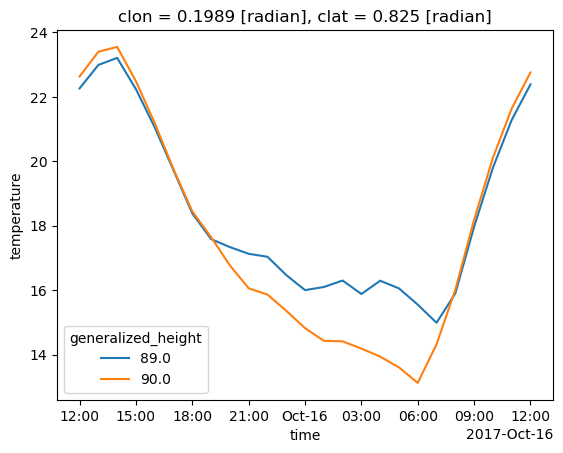

In [56]:
icon.temperature.isel(height = np.arange(88, 90)).plot.line(x="time")

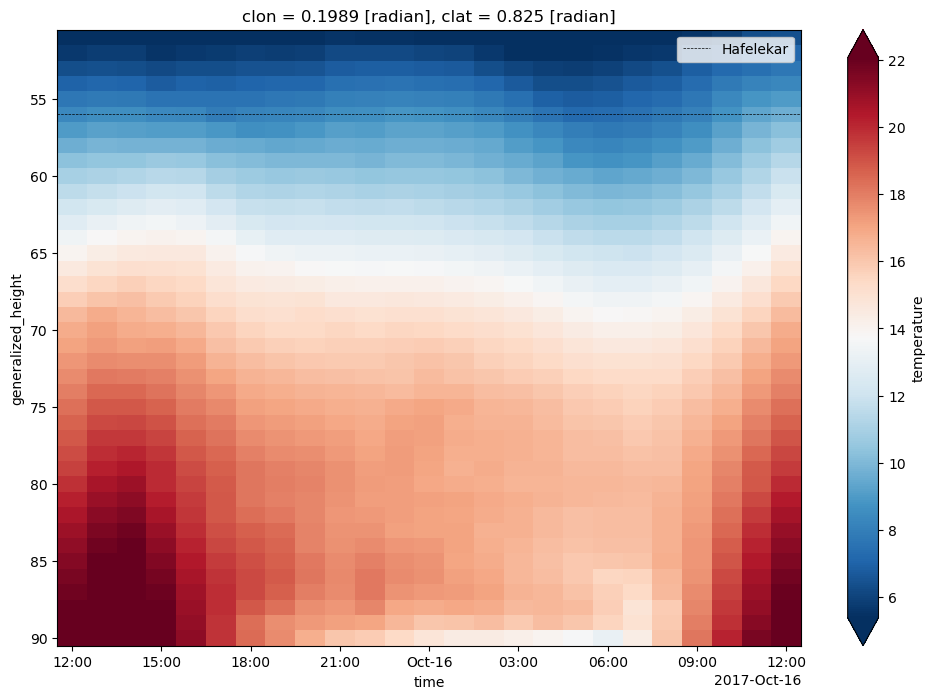

In [71]:
icon.temperature.isel(height = np.arange(50, 90)).plot(robust=True, x = "time", y = "height", figsize=(12, 8), cmap="RdBu_r")
plt.gca().invert_yaxis()
plt.axhline(y = 56, color = 'k', linewidth = 0.5, linestyle = 'dashed', label = "Hafelekar")  
plt.legend()

## Icon2TE

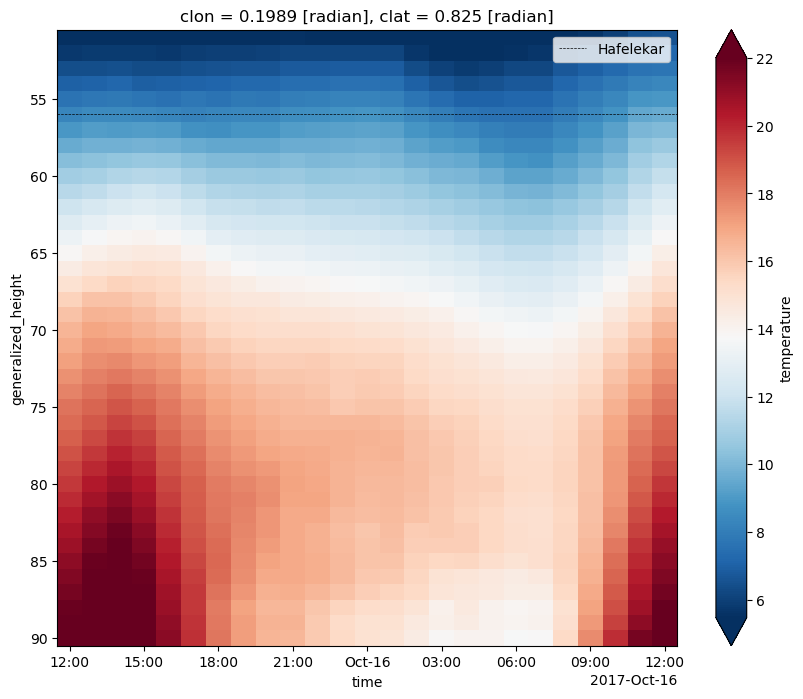

In [75]:
icon2te.temperature.isel(height = np.arange(50, 90)).plot(robust=True, x = "time", y = "height", figsize=(10, 8), cmap="RdBu_r")
plt.gca().invert_yaxis()
plt.axhline(y = 56, color = 'k', linewidth = 0.5, linestyle = 'dashed', label = "Hafelekar")  
plt.legend()